# Оценка перспективности проекта "МОБИЛИ и КОВРИКИ"

In [1]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  

In [2]:
#читаю предоставленные файлы
#загружаю локальную версию
ozon = pd.read_csv(r'C://Users//Admin//Desktop//мобили//обработанные данные//mobile_ozn.csv', sep=',', engine='python')  
yam = pd.read_csv(r'C://Users//Admin//Desktop//мобили//обработанные данные//mobile_yam.csv', sep=',', engine='python')  
wb = pd.read_csv(r'C://Users//Admin//Desktop//мобили//обработанные данные//mobile_wb.csv', sep=',', engine='python') #датасет вайлдберриз

ozon_2 = pd.read_csv(r'C://Users//Admin//Desktop//мобили//обработанные данные//kovriki_ozn.csv', sep=',', engine='python')  
yam_2 = pd.read_csv(r'C://Users//Admin//Desktop//мобили//обработанные данные//kovriki_yam.csv', sep=',', engine='python')  
wb_2 = pd.read_csv(r'C://Users//Admin//Desktop//мобили//обработанные данные//kovriki_wb.csv', sep=',', engine='python')

# Объединение DataFrame ozon_2, yam_2 и wb_2  
ozon = pd.concat([ozon_2], ignore_index=True)  
yam = pd.concat([yam_2], ignore_index=True)  
wb = pd.concat([wb_2], ignore_index=True)  

In [3]:
# настройки отображения

# Увеличить ширину столбца  
pd.set_option('display.max_colwidth', None)  
# Отобразить все столбцы  
pd.set_option('display.max_columns', None)  

In [4]:
#присоединяю таблицы друг под другом  
data = pd.concat([ozon, yam, wb], ignore_index=True)

# привожу все данные к строковому значению
data['brand'] = data['brand'].astype(str)

# убираю из данных пробелы и привожу к нижнему регистру
data['brand'] = data['brand'].str.replace(' ', '_').str.lower()  

In [5]:
# в новой переменной оставляю только коврики

mobile = data[(data['kov'] == True)]

In [6]:
# создаю фильтрованные переменные по маркетплейсам 

mobile_ozn = mobile[mobile['market'] == 'ozon']
mobile_wb = mobile[mobile['market'] == 'wb']
mobile_yam = mobile[mobile['market'] == 'yam']


In [7]:
mobile_ozn.to_csv('mobile_ozn.csv', index=False)
mobile_wb.to_csv('mobile_wb.csv', index=False)
mobile_yam.to_csv('mobile_yam.csv', index=False)

## Исследовательский анализ

Для оценки ассортимента и продаж, выручки между маркетплейсами создаю круговые диаграммы

In [8]:
# подсчет товаров по маркетплейсам
counts = data.groupby('market')['name'].count()

# ссумирую выручку по маркетплейсам
sum_rev_mp = mobile.groupby('market')['revenue'].sum()  

# ссумирую продажи по маркетплейсам
sum_sales_mp = mobile.groupby('market')['sales'].sum()  



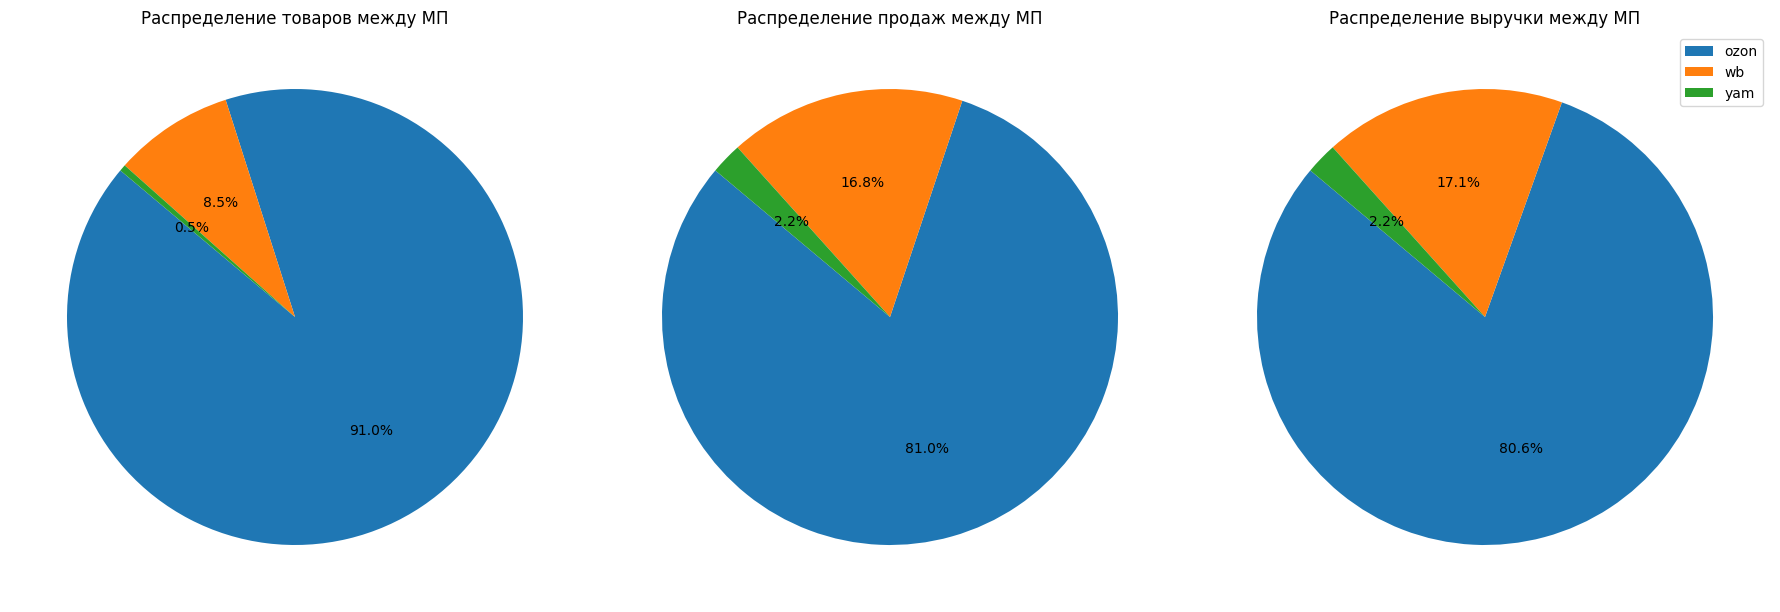

In [9]:
# создаю графики

# размер графиков  
plt.figure(figsize=(18, 6))  
  
# первый круговой график  
plt.subplot(1, 3, 1)  
plt.pie(counts, autopct='%1.1f%%', startangle=140)  
plt.title('Распределение товаров между МП')  

  
# второй круговой график  
plt.subplot(1, 3, 2)  
plt.pie(sum_rev_mp, autopct='%1.1f%%', startangle=140)  
plt.title('Распределение продаж между МП')  
  

# третий круговой график  
plt.subplot(1, 3, 3)  
plt.pie(sum_sales_mp, autopct='%1.1f%%', startangle=140)  
plt.title('Распределение выручки между МП')  
plt.legend(labels=counts.index)  
  
plt.tight_layout()  
plt.show()  

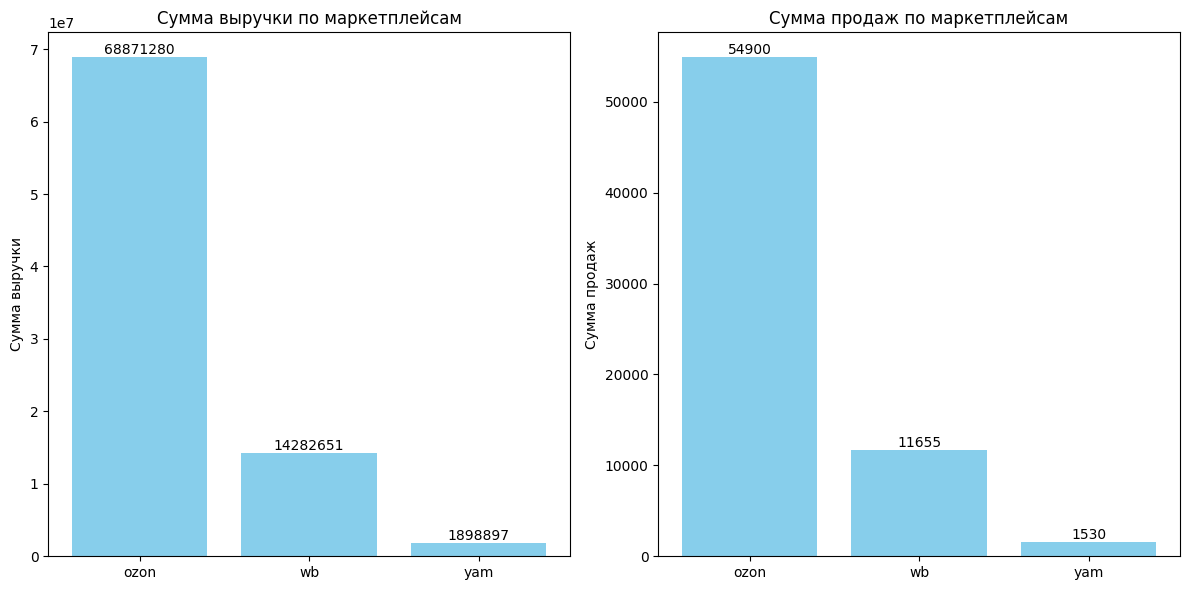

In [10]:
# Размер графиков  
plt.figure(figsize=(12, 6))  
  
# Первая столбчатая диаграмма  
plt.subplot(1, 2, 1)  
bars1 = plt.bar(sum_rev_mp.index, sum_rev_mp.values, color='skyblue')  
for bar in bars1:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  
plt.ylabel('Сумма выручки')  
plt.title('Сумма выручки по маркетплейсам')  
  
# Вторая столбчатая диаграмма  
plt.subplot(1, 2, 2)  
bars2 = plt.bar(sum_sales_mp.index, sum_sales_mp.values, color='skyblue')  
for bar in bars2:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  
plt.ylabel('Сумма продаж')  
plt.title('Сумма продаж по маркетплейсам')  
  
plt.tight_layout()  
plt.show()  

In [11]:
# подсчет количества продавцов на маркетплейсах
print(f"Количество продавцов на OZON: {mobile_ozn.groupby('seller')['sales'].sum().shape[0]}")  
print(f"Количество продавцов на WILDBERRIES: {mobile_wb.groupby('seller')['sales'].sum().shape[0]}")  
print(f"Количество продавцов на Я.Маркете: {mobile_yam.groupby('seller')['sales'].sum().shape[0]}")


Количество продавцов на OZON: 3690
Количество продавцов на WILDBERRIES: 657
Количество продавцов на Я.Маркете: 84


In [12]:
# создаю переменную содержащие топ-5 продавцов по продажам для всех маркетплейсов

sellers_ozon = mobile_ozn.groupby('seller')['sales'].sum().sort_values(ascending=False).head()
sellers_yam = mobile_yam.groupby('seller')['sales'].sum().sort_values(ascending=False).head()
sellers_wb = mobile_wb.groupby('seller')['sales'].sum().sort_values(ascending=False).head()

In [13]:
# создаю переменную содержащие топ-5 продавцов по выручке для всех маркетплейсов

sellers_rev_ozon = mobile_ozn.groupby('seller')['revenue'].sum().sort_values(ascending=False).head()
sellers_rev_wb = mobile_wb.groupby('seller')['revenue'].sum().sort_values(ascending=False).head()
sellers_rev_yam = mobile_yam.groupby('seller')['revenue'].sum().sort_values(ascending=False).head()

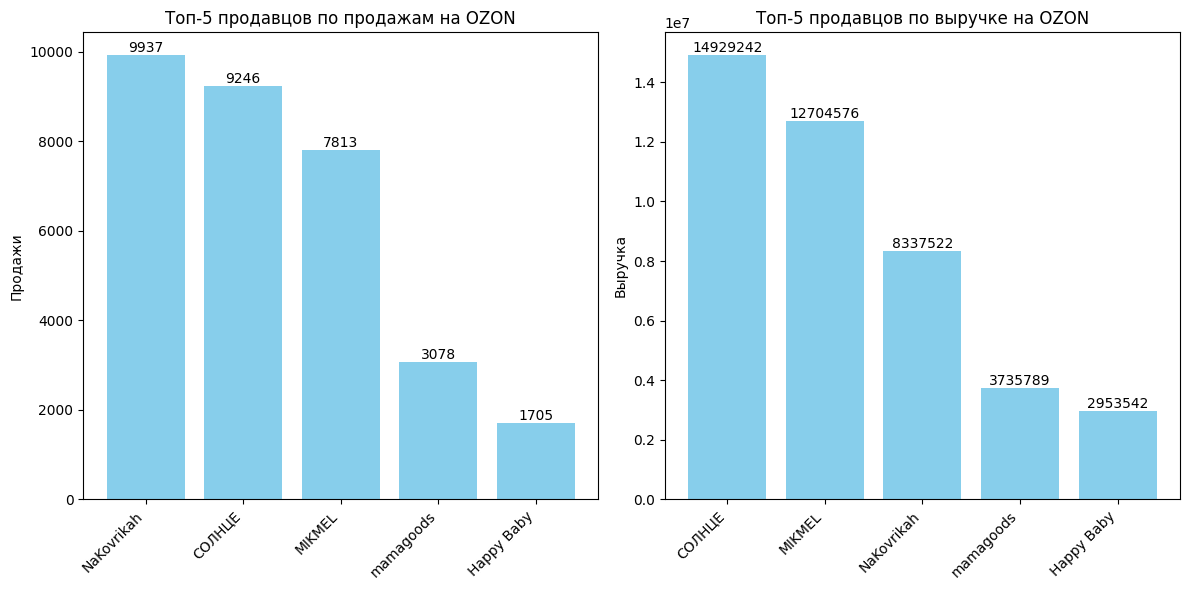

In [14]:
# создаю графики

plt.figure(figsize=(12, 6))  

# Первая столбчатая диаграмма  
plt.subplot(1, 2, 1)

# Создаем столбчатую диаграмму с подписями брендов и продажами  
bars1 = plt.bar(sellers_ozon.index, sellers_ozon.values, color='skyblue')  
   
plt.ylabel('Продажи')  
plt.title('Топ-5 продавцов по продажам на OZON')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars1:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  

#************************************************************************************************************
    
# вторая столбчатая диаграмма  
plt.subplot(1, 2, 2)

# создаю столбчатую диаграмму с подписями брендов и продажами  
bars2 = plt.bar(sellers_rev_ozon.index, sellers_rev_ozon.values, color='skyblue')  
   
plt.ylabel('Выручка')  
plt.title('Топ-5 продавцов по выручке на OZON')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars2:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

#************************************************************************************************************    

# отображение
plt.tight_layout()  
plt.show() 

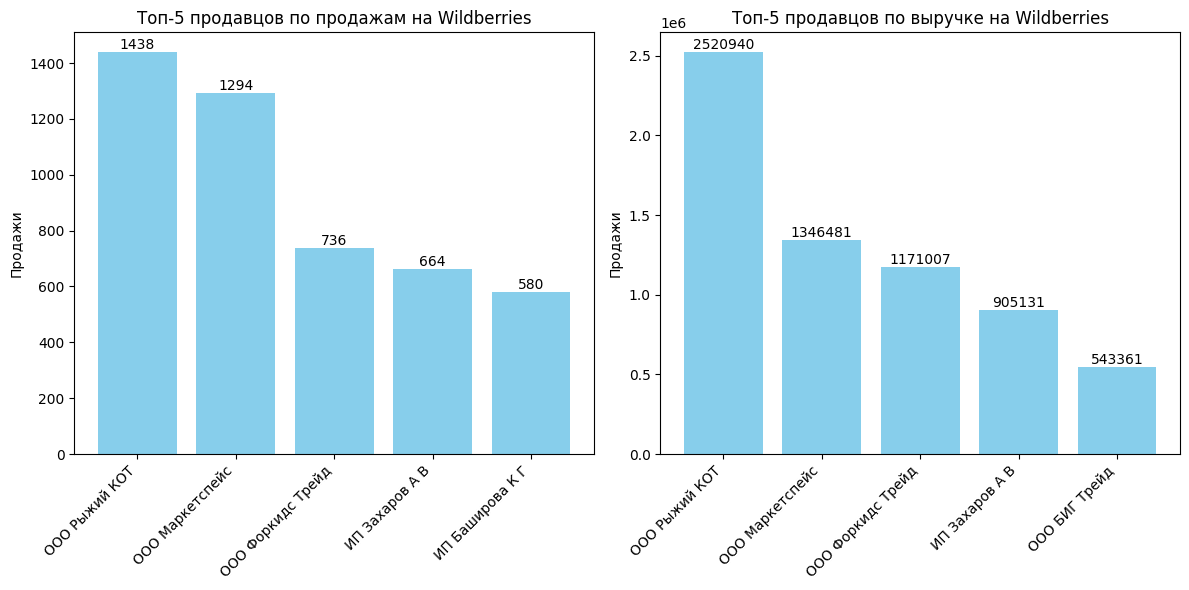

In [15]:
# создаю графики

plt.figure(figsize=(12, 6))  

# Первая столбчатая диаграмма  
plt.subplot(1, 2, 1)

# Создаем столбчатую диаграмму с подписями брендов и продажами  
bars1 = plt.bar(sellers_wb.index, sellers_wb.values, color='skyblue')  
   
plt.ylabel('Продажи')  
plt.title('Топ-5 продавцов по продажам на Wildberries')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars1:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  

#************************************************************************************************************
    
# вторая столбчатая диаграмма  
plt.subplot(1, 2, 2)

# создаю столбчатую диаграмму с подписями брендов и продажами  
bars2 = plt.bar(sellers_rev_wb.index, sellers_rev_wb.values, color='skyblue')  
  
plt.ylabel('Продажи')  
plt.title('Топ-5 продавцов по выручке на Wildberries')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars2:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  

#************************************************************************************************************    
   
# отображение
plt.tight_layout()  
plt.show() 

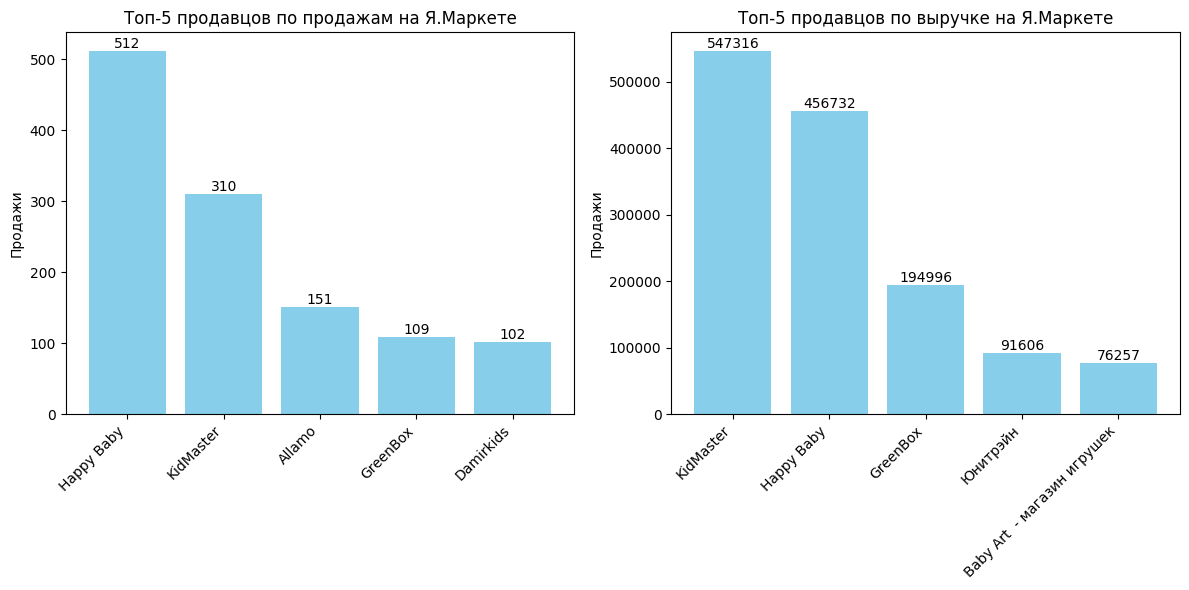

In [16]:
# создаю графики

plt.figure(figsize=(12, 6))  

# Первая столбчатая диаграмма  
plt.subplot(1, 2, 1)

# Создаем столбчатую диаграмму с подписями брендов и продажами  
bars1 = plt.bar(sellers_yam.index, sellers_yam.values, color='skyblue')  
   
plt.ylabel('Продажи')  
plt.title('Топ-5 продавцов по продажам на Я.Маркете')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars1:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  

#************************************************************************************************************
    
# вторая столбчатая диаграмма  
plt.subplot(1, 2, 2)

# создаю столбчатую диаграмму с подписями брендов и продажами  
bars2 = plt.bar(sellers_rev_yam.index, sellers_rev_yam.values, color='skyblue')  
  
plt.ylabel('Продажи')  
plt.title('Топ-5 продавцов по выручке на Я.Маркете')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars2:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  

#************************************************************************************************************    
   
# отображение
plt.tight_layout()  
plt.show() 

In [17]:
#топ-10 товаров по количеству заказов за две недели и за весь период
sellers_ozon = mobile_ozn.sort_values(by='sales', ascending=False).head(10).reset_index()
print(f"ТОП-10 товаров на ozon по продажам:")  
sellers_ozon

ТОП-10 товаров на ozon по продажам:


,index,sku,name,brand,seller,comments,final_price,sales,revenue,revenue_potential,lost_profit,days_with_sales,rating,market,mobile,dugs,trenager,podves,stoyka,rastyag,spiral,music,tree,kov,cat_sales
0,1,616188931,"Ортопедический игровой развивающий коврик - пазл детский ОРТОДОН, с разнообразными массажными поверхностями, Любимый шоколад, 12 пазлов",ортодон,CОЛНЦЕ,17338,1361,1589,2128421,2128421,0,30,"4,94",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
1,0,1067064182,"Ортопедический игровой развивающий коврик - пазл детский ОРТОДОН, с разнообразными массажными поверхностями, Добрый карамель, 18 пазлов",ортодон,CОЛНЦЕ,17341,2083,1281,2651790,"3616077,2727","964287,2727",19,"4,94",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
2,2,474876351,"Коврик детский для ползания 150x200 MIKMEL ECO Облачка/Зоопарк, складной развивающий игровой двусторонний на пол для новорожденных малышей термоковрик пазл",mikmel,MIKMEL,8500,1529,1279,1917175,1917175,0,30,"4,92",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
3,63,995741702,Детский развивающий водный коврик для новорожденного надувной игровой для младенцев от 0 месяцев коврики для развития детей Ridberg (Blue),ridberg,Ридберг,2121,290,968,280720,280720,0,30,"4,86",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
4,3,882385894,"Коврик детский для ползания 180x200 MIKMEL ECO Облачка/Зоопарк, складной развивающий игровой двусторонний на пол для новорожденных малышей термоковрик пазл",mikmel,MIKMEL,5037,1636,941,1509259,1509259,0,30,"4,91",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
5,4,882383734,"Коврик детский для ползания 180x200 MIKMEL ECO Городской трафик/Зоопарк, складной развивающий игровой двусторонний на пол для новорожденных малышей термоковрик пазл",mikmel,MIKMEL,5037,1564,906,1414850,1414850,0,30,"4,91",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
6,5,882390998,"Коврик детский для ползания 180x200 MIKMEL ECO Дороги/Холмы, складной развивающий игровой двусторонний на пол для новорожденных малышей термоковрик пазл",mikmel,MIKMEL,5044,1636,841,1349048,1349048,0,30,"4,91",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
7,15,474614341,"Коврик детский двухсторонний для ползания 120x180х0,8 WellMat (Meitoku) Городок 3 складной развивающий игровой термоковрик для малышей и новорожденных непромокаемый моющийся для игры пазл",wellmat,NaKovrikah,9844,968,774,756219,756219,0,30,"4,88",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
8,14,474284896,"Коврик детский двухсторонний для ползания 120x180х0,8 WellMat (Meitoku) Мишка/Автомобиль в городе складной развивающий игровой термоковрик для малышей и новорожденных непромокаемый моющийся",wellmat,NaKovrikah,9841,986,769,765535,765535,0,30,"4,88",ozon,True,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
9,25,324601764,"Коврик детский игровой двусторонний рулонный Meitoku ""Клеточки/Жираф"" 120x150x0,5 см развивающий коврик детский для ползания в манеж водонепроницаемый на пол легко моется",wellmat,NaKovrikah,4920,830,723,575840,575840,0,30,"4,91",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж


In [18]:
sellers_wb = mobile_wb.sort_values(by='sales', ascending=False).head(10).reset_index()
print(f"ТОП-10 товаров на WILDBERRIES по продажам:")  
sellers_wb

ТОП-10 товаров на WILDBERRIES по продажам:


,index,sku,name,brand,seller,comments,final_price,sales,revenue,revenue_potential,lost_profit,days_with_sales,rating,market,mobile,dugs,trenager,podves,stoyka,rastyag,spiral,music,tree,kov,cat_sales
0,35317,122793796,Музыкальный коврик детский развивающий,playokay,ООО Маркетспейс,3300,1012,814,784823,784823,0,30,5,wb,False,False,False,False,False,False,False,True,False,True,Свыше 200 продаж
1,35316,13538769,Развивающий коврик игровой с пианино для новорожденных,joywill,ИП Захаров А В,6067,1160,661,901023,901023,0,30,5,wb,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
2,35314,12707555,"Детский коврик с игрушками развивающий ""Play Gym"" CC9040",funkids,ООО Форкидс Трейд,6875,1683,603,1008130,"1890243,75","882113,75",16,5,wb,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
3,35315,52482515,Коврик развивающий с игрушками для малышей 80х80х55 см,рыжийкот,ООО Рыжий КОТ,6073,1756,558,984335,984335,-0,30,5,wb,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
4,35318,52482513,Коврик развивающий с игрушками для малышей 80х80х55 см,рыжийкот,ООО Рыжий КОТ,6073,1757,430,763429,763429,0,30,5,wb,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
5,35320,122793795,Музыкальный коврик детский развивающий,playokay,ООО Маркетспейс,3300,1106,386,400185,400185,0,30,5,wb,False,False,False,False,False,False,False,True,False,True,Свыше 200 продаж
6,35326,57839345,"Игровой коврик-парковка с дорогами, дорожные знаки",jumpuffin,ИП Баширова К Г,1529,664,370,248972,248972,0,30,5,wb,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
7,35322,52062910,Развивающий коврик детский игровой для детей малыша с дугой,abcage,Качественные Товары Abcage,1447,1044,332,346600,346600,0,30,5,wb,False,True,False,False,False,False,False,False,False,True,Свыше 200 продаж
8,35319,52482514,Коврик развивающий с игрушками для малышей 80х80х55 см,рыжийкот,ООО Рыжий КОТ,6073,1756,240,422802,422802,0,30,5,wb,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
9,35321,48848748,Развивающий коврик детский складной 150,mamagoods,ИП Левкович Е В,1177,1529,237,362305,362305,0,30,5,wb,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж


In [19]:
sellers_yam = mobile_yam.sort_values(by='sales', ascending=False).head(10).reset_index()
print(f"ТОП-10 товаров на Я.Маркет по продажам:")  
sellers_yam

ТОП-10 товаров на Я.Маркет по продажам:


,index,sku,name,brand,seller,comments,final_price,sales,revenue,revenue_potential,lost_profit,days_with_sales,rating,market,mobile,dugs,trenager,podves,stoyka,rastyag,spiral,music,tree,kov,cat_sales
0,35135,102318243893,"331919, Коврик водный развивающий Happy Baby, игрушка детская для малышей, Water Floor, для стульчиков Berny Lux, бежевый с блестками, 75х45",happybaby,Happy Baby,28,626,337,178705,0,0,22,"4,52",yam,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
1,35134,101996819048,"331911, Коврик для рисования Happy Baby Aqua Draw, для рисования водой, с валиком, трафаретами и маркерами",happybaby,Happy Baby,44,1652,175,278027,362644,84617,23,"4,77",yam,False,False,False,False,False,False,False,False,False,True,до 200 продаж
2,35136,101239067144,Развивающий коврик Funkids с игрушками Play Ground Gym CC9040,funkids,KidMaster,200,1399,120,175401,239183,63782,22,"4,84",yam,False,False,False,False,False,False,False,False,False,True,до 150 продаж
3,35149,101836269594,"Акваковрик Allamo надувной детский 68*53 см ""Рыбки"", игрушки для малышей и новорожденных",allamo,Allamo,217,268,96,24374,0,0,22,"4,61",yam,False,False,False,False,False,False,False,False,False,True,до 100 продаж
4,35153,101408730314,Развивающий водный коврик,panawealthinterholdings,Damirkids,81,228,94,20176,0,0,21,"4,43",yam,False,False,False,False,False,False,False,False,False,True,до 100 продаж
5,35162,102076761079,Акваковрик надувной с отсеком для воды,allamo,Allamo,217,285,55,13733,19619,5886,21,"4,61",yam,False,False,False,False,False,False,False,False,False,True,до 70 продаж
6,35138,101239034757,Развивающий коврик Funkids с игрушками Play Ground Gym CC9038,funkids,KidMaster,203,1647,46,69849,110288,40439,19,"4,84",yam,False,False,False,False,False,False,False,False,False,True,до 70 продаж
7,35142,101635288735,"Коврик игровой, развивающий, мягкий, с пианино и погремушками, со звуком и светом",bestlike,GreenBox,40,1412,37,46467,82001,35534,17,"4,73",yam,False,False,False,False,False,False,False,False,False,True,до 70 продаж
8,35139,101830188974,Детский игровой развивающий коврик с бортиками и шариками,bestlike,Юнитрэйн,15,2549,34,69132,121998,52866,17,5,yam,False,False,False,False,False,False,False,False,False,True,до 70 продаж
9,35141,101393009728,Развивающий коврик Funkids с игрушками Play Ground Gym CC9036,funkids,KidMaster,203,1865,32,48815,81358,32543,18,"4,84",yam,False,False,False,False,False,False,False,False,False,True,до 70 продаж


In [20]:
sells_total = mobile.sort_values(by='sales', ascending=False).head(10).reset_index()
print(f"ТОП-10 товаров на всех мп по продажам:")  
sells_total

ТОП-10 товаров на всех мп по продажам:


,index,sku,name,brand,seller,comments,final_price,sales,revenue,revenue_potential,lost_profit,days_with_sales,rating,market,mobile,dugs,trenager,podves,stoyka,rastyag,spiral,music,tree,kov,cat_sales
0,1,616188931,"Ортопедический игровой развивающий коврик - пазл детский ОРТОДОН, с разнообразными массажными поверхностями, Любимый шоколад, 12 пазлов",ортодон,CОЛНЦЕ,17338,1361,1589,2128421,2128421,0,30,"4,94",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
1,0,1067064182,"Ортопедический игровой развивающий коврик - пазл детский ОРТОДОН, с разнообразными массажными поверхностями, Добрый карамель, 18 пазлов",ортодон,CОЛНЦЕ,17341,2083,1281,2651790,"3616077,2727","964287,2727",19,"4,94",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
2,2,474876351,"Коврик детский для ползания 150x200 MIKMEL ECO Облачка/Зоопарк, складной развивающий игровой двусторонний на пол для новорожденных малышей термоковрик пазл",mikmel,MIKMEL,8500,1529,1279,1917175,1917175,0,30,"4,92",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
3,63,995741702,Детский развивающий водный коврик для новорожденного надувной игровой для младенцев от 0 месяцев коврики для развития детей Ridberg (Blue),ridberg,Ридберг,2121,290,968,280720,280720,0,30,"4,86",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
4,3,882385894,"Коврик детский для ползания 180x200 MIKMEL ECO Облачка/Зоопарк, складной развивающий игровой двусторонний на пол для новорожденных малышей термоковрик пазл",mikmel,MIKMEL,5037,1636,941,1509259,1509259,0,30,"4,91",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
5,4,882383734,"Коврик детский для ползания 180x200 MIKMEL ECO Городской трафик/Зоопарк, складной развивающий игровой двусторонний на пол для новорожденных малышей термоковрик пазл",mikmel,MIKMEL,5037,1564,906,1414850,1414850,0,30,"4,91",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
6,5,882390998,"Коврик детский для ползания 180x200 MIKMEL ECO Дороги/Холмы, складной развивающий игровой двусторонний на пол для новорожденных малышей термоковрик пазл",mikmel,MIKMEL,5044,1636,841,1349048,1349048,0,30,"4,91",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
7,35317,122793796,Музыкальный коврик детский развивающий,playokay,ООО Маркетспейс,3300,1012,814,784823,784823,0,30,5,wb,False,False,False,False,False,False,False,True,False,True,Свыше 200 продаж
8,15,474614341,"Коврик детский двухсторонний для ползания 120x180х0,8 WellMat (Meitoku) Городок 3 складной развивающий игровой термоковрик для малышей и новорожденных непромокаемый моющийся для игры пазл",wellmat,NaKovrikah,9844,968,774,756219,756219,0,30,"4,88",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
9,14,474284896,"Коврик детский двухсторонний для ползания 120x180х0,8 WellMat (Meitoku) Мишка/Автомобиль в городе складной развивающий игровой термоковрик для малышей и новорожденных непромокаемый моющийся",wellmat,NaKovrikah,9841,986,769,765535,765535,0,30,"4,88",ozon,True,False,False,False,False,False,False,False,False,True,Свыше 200 продаж


In [21]:
#средняя цена по всем МП
mid_price = mobile['final_price'].mean()
print('Средняя цена на всех маркет плейсах', round(mid_price))
ozon_mid_price = mobile_ozn['final_price'].mean()
print('средняя цена OZON ', round(ozon_mid_price))
wb_mid_price = mobile_wb['final_price'].mean()
print('средняя цена Wildberries ', round(wb_mid_price))
yam_mid_price = mobile_yam['final_price'].mean()
print('средняя цена Я.Маркет ', round(yam_mid_price))

Средняя цена на всех маркет плейсах 3681
средняя цена OZON  3849
средняя цена Wildberries  1959
средняя цена Я.Маркет  2177


In [22]:
#обзор всех брендов
print('Всего разных брендов представлено ', mobile['brand'].value_counts().count())

Всего разных брендов представлено  1443


In [23]:
# определяю топ-10 брендов с топ-3 товарами по количеству продаж

#список брендов
ozon_brands = list(mobile_ozn['brand'].value_counts().head(10).index)  

#таблица со значениями
ozon_brand_data = []  
for brand in ozon_brands:  
    ozon_brand_data.append(mobile_ozn[mobile_ozn['brand'] == brand].head(3))  

#объединяю данные для каждого бренда в одну таблицу  
combined_data_ozon = pd.concat(ozon_brand_data)  
  
sorted_ozon = combined_data_ozon.sort_values(by='sales', ascending=False).head(10)


#******************************************************************************************
#тоже самое для вб

wb_brands = list(mobile_wb['brand'].value_counts().head(10).index)  
  
wb_brand_data = []  
for brand in wb_brands:  
    wb_brand_data.append(mobile_wb[mobile_wb['brand'] == brand].head(3))  

combined_data_wb = pd.concat(wb_brand_data)  
  
sorted_wb = combined_data_wb.sort_values(by='sales', ascending=False).head(10)


#******************************************************************************************
#тоже самое для яндекс маркета
yam_brands = list(mobile_yam['brand'].value_counts().head(10).index)  
  
yam_brand_data = []  
for brand in yam_brands:  
    yam_brand_data.append(mobile_yam[mobile_yam['brand'] == brand].head(3))  

combined_data_yam = pd.concat(yam_brand_data)  
  
sorted_yam = combined_data_yam.sort_values(by='sales', ascending=False).head(10)



In [24]:
# отдельные переменные для сортировки по брендам для маркетплейсов по продажам
sales_by_brand_sorted_ozn = sorted_ozon.groupby('brand')['sales'].sum().sort_values(ascending=False) 
sales_by_brand_sorted_wb = sorted_wb.groupby('brand')['sales'].sum().sort_values(ascending=False)  
sales_by_brand_sorted_yam = sorted_yam.groupby('brand')['sales'].sum().sort_values(ascending=False)  

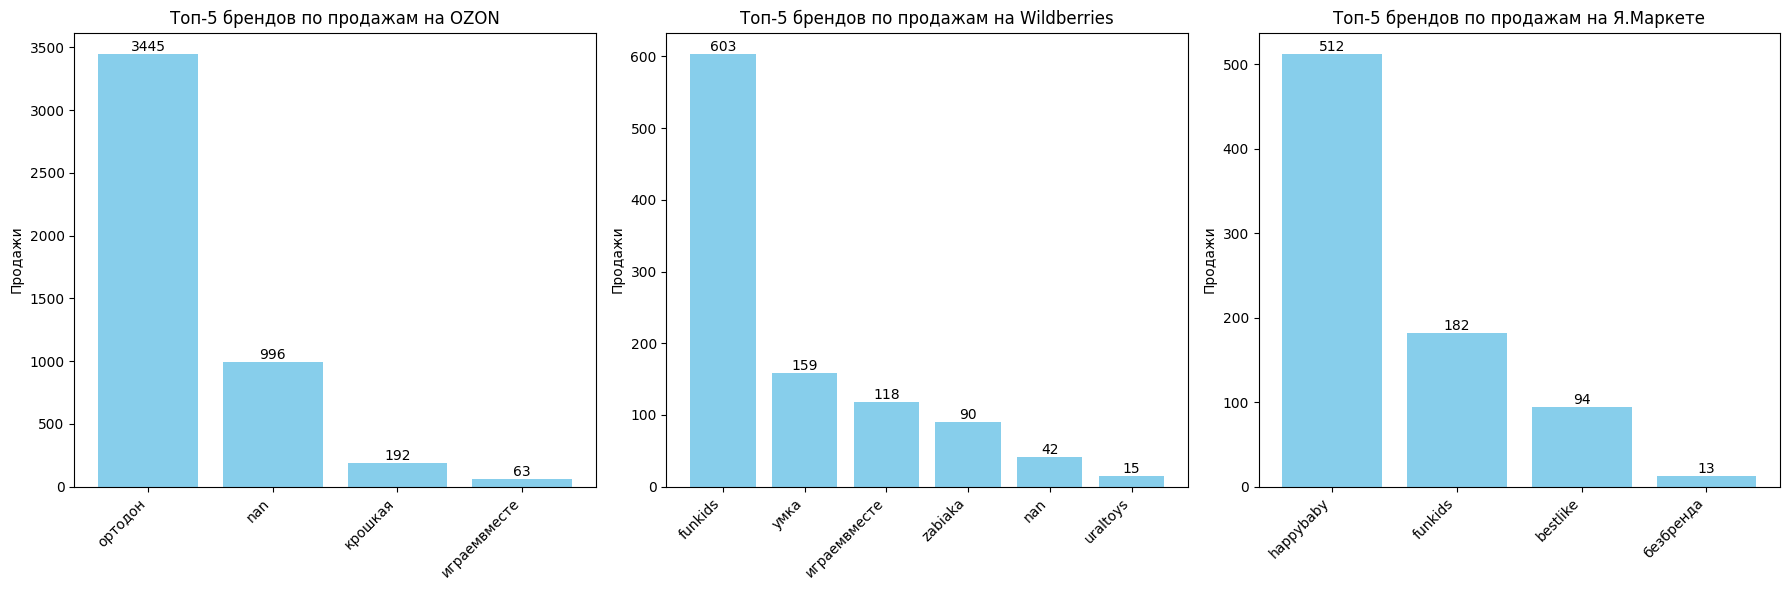

In [25]:
# создаю графики

plt.figure(figsize=(18, 6))  

# Первая столбчатая диаграмма  
plt.subplot(1, 3, 1)

# Создаем столбчатую диаграмму с подписями брендов и продажами  
bars1 = plt.bar(sales_by_brand_sorted_ozn.index, sales_by_brand_sorted_ozn.values, color='skyblue')  
   
plt.ylabel('Продажи')  
plt.title('Топ-5 брендов по продажам на OZON')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars1:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  

#************************************************************************************************************
    
# вторая столбчатая диаграмма  
plt.subplot(1, 3, 2)

# создаю столбчатую диаграмму с подписями брендов и продажами  
bars2 = plt.bar(sales_by_brand_sorted_wb.index, sales_by_brand_sorted_wb.values, color='skyblue')  
  
plt.ylabel('Продажи')  
plt.title('Топ-5 брендов по продажам на Wildberries')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars2:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  

#************************************************************************************************************    
    
# вторая столбчатая диаграмма  
plt.subplot(1, 3, 3)

# создаю столбчатую диаграмму с подписями брендов и продажами  
bars3 = plt.bar(sales_by_brand_sorted_yam.index, sales_by_brand_sorted_yam.values, color='skyblue')  
  
plt.ylabel('Продажи')  
plt.title('Топ-5 брендов по продажам на Я.Маркете')  
  
plt.xticks(rotation=45, ha='right')  
  
# добавляем подписи значений к столбцам  
for bar in bars3:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  

    
#************************************************************************************************************

# отображение
plt.tight_layout()  
plt.show()

In [26]:
print('Лучшие товары топовых брендов OZON')
sorted_ozon

Лучшие товары топовых брендов OZON


,sku,name,brand,seller,comments,final_price,sales,revenue,revenue_potential,lost_profit,days_with_sales,rating,market,mobile,dugs,trenager,podves,stoyka,rastyag,spiral,music,tree,kov,cat_sales
1,616188931,"Ортопедический игровой развивающий коврик - пазл детский ОРТОДОН, с разнообразными массажными поверхностями, Любимый шоколад, 12 пазлов",ортодон,CОЛНЦЕ,17338,1361,1589,2128421,2128421,0,30,"4,94",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
0,1067064182,"Ортопедический игровой развивающий коврик - пазл детский ОРТОДОН, с разнообразными массажными поверхностями, Добрый карамель, 18 пазлов",ортодон,CОЛНЦЕ,17341,2083,1281,2651790,"3616077,2727","964287,2727",19,"4,94",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
6,616209371,"Детский орто коврик для массажа ног модульный развивающий ОРТОДОН, развивашка, Добрый пастель, 18 пазлов",ортодон,CОЛНЦЕ,17338,2083,575,1168940,1168940,0,30,"4,94",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
12,525068354,"Детский развивающий коврик для малышей с бортиками, манеж для новорожденных",nan,ЮниТрэйн,1172,1748,479,842828,842828,0,30,"4,81",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
60,467914328,"Развивающий коврик для новорожденного, AbcAge, музыкальный, для малышей, с пианино",nan,abcAge,1733,945,315,295634,295634,0,30,"4,87",ozon,False,False,False,False,False,False,False,True,False,True,Свыше 200 продаж
53,474971904,Развивающий модульный коврик пазл SPORTO.ONE Ассорти (16 модулей) / Напольный с разнообразными поверхностями игровой детский массажный коврик,nan,HitList,1953,1600,202,322532,322532,0,30,"4,96",ozon,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
265,492315205,"Детский игровой Развивающий водный коврик для малышей, акваковрик, Крошка Я, ""Дружилки"", 80х50",крошкая,Эврики,460,405,92,38608,38608,0,28,"4,78",ozon,False,False,False,False,False,False,False,False,False,True,до 100 продаж
457,167899954,Коврик пазл игровой развивающий напольный для малышей Буквы Играем вместе 36 элементов,играемвместе,СИМБАТ,1578,191,63,12240,15300,3060,21,"4,75",ozon,False,False,False,False,False,False,False,False,False,True,до 70 продаж
350,492316639,"Детский игровой Развивающий водный коврик для малышей, акваковрик, Крошка Я, ""Тропики """,крошкая,Эврики,460,420,51,22101,"24556,6667","2455,6667",21,"4,78",ozon,False,False,False,False,False,False,False,False,False,True,до 70 продаж
347,492309479,"Детский игровой Развивающий водный коврик для малышей, акваковрик, Крошка Я, ""Домашние животные""",крошкая,Эврики,460,455,49,22622,22622,0,18,"4,78",ozon,False,False,False,False,False,False,False,False,False,True,до 70 продаж


In [27]:
print('Лучшие товары топовых брендов Wildberries')
sorted_wb

Лучшие товары топовых брендов Wildberries


,sku,name,brand,seller,comments,final_price,sales,revenue,revenue_potential,lost_profit,days_with_sales,rating,market,mobile,dugs,trenager,podves,stoyka,rastyag,spiral,music,tree,kov,cat_sales
35314,12707555,"Детский коврик с игрушками развивающий ""Play Gym"" CC9040",funkids,ООО Форкидс Трейд,6875,1683,603,1008130,"1890243,75","882113,75",16,5,wb,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
35353,159523081,Детский коврик для малыша игровой Пианино Мимимишки,умка,ООО С-Маркет,106,738,121,63288,63288,0,28,5,wb,False,False,False,False,False,False,False,False,False,True,до 150 продаж
35406,59473825,"Мягкий развивающий коврик-пазл ""Цифры"", учим цифры",zabiaka,ИП Разначенко Яна Вячеславовна,300,380,54,21150,21150,0,24,5,wb,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35446,157838569,Коврик пазл детский для ползания малышей мягкий Цифры 10 эл.,играемвместе,ООО С-Маркет,303,254,53,14411,14411,0,24,5,wb,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35372,70685707,Коврик пазл детский для ползания мягкий Три Кота 8 эл.,играемвместе,ООО С-Маркет,303,842,48,39265,39265,0,22,5,wb,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35456,188973628,Развивающий водный коврик с разными рисунками,nan,ИП Самун А А,89,287,42,12904,"14889,2308","1985,2308",24,5,wb,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35430,163727845,Коврик книжка для рисования водой для малышей Синий трактор,умка,ООО С-Маркет,70,566,38,17144,17144,0,22,4,wb,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35433,59473824,"Мягкий развивающий коврик-пазл ""Буквы и цифры"", 60 деталей",zabiaka,ИП Разначенко Яна Вячеславовна,300,423,36,16346,16346,0,19,5,wb,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35462,158430452,Коврик пазл детский для ползания мягкий Малышарики 8 эл.,играемвместе,ООО С-Маркет,303,751,17,12191,12191,0,9,5,wb,False,False,False,False,False,False,False,False,False,True,до 30 продаж
35428,173456467,"Двухсторонний игровой коврик ""Прогулка на природе""",uraltoys,ООО ТОЙ Импорт,97,1112,15,17461,17461,0,11,5,wb,False,False,False,False,False,False,False,False,False,True,до 30 продаж


In [28]:
print('Лучшие товары топовых брендов Я.Маркет')
sorted_yam

Лучшие товары топовых брендов Я.Маркет


,sku,name,brand,seller,comments,final_price,sales,revenue,revenue_potential,lost_profit,days_with_sales,rating,market,mobile,dugs,trenager,podves,stoyka,rastyag,spiral,music,tree,kov,cat_sales
35135,102318243893,"331919, Коврик водный развивающий Happy Baby, игрушка детская для малышей, Water Floor, для стульчиков Berny Lux, бежевый с блестками, 75х45",happybaby,Happy Baby,28,626,337,178705,0,0,22,"4,52",yam,False,False,False,False,False,False,False,False,False,True,Свыше 200 продаж
35134,101996819048,"331911, Коврик для рисования Happy Baby Aqua Draw, для рисования водой, с валиком, трафаретами и маркерами",happybaby,Happy Baby,44,1652,175,278027,362644,84617,23,"4,77",yam,False,False,False,False,False,False,False,False,False,True,до 200 продаж
35136,101239067144,Развивающий коврик Funkids с игрушками Play Ground Gym CC9040,funkids,KidMaster,200,1399,120,175401,239183,63782,22,"4,84",yam,False,False,False,False,False,False,False,False,False,True,до 150 продаж
35138,101239034757,Развивающий коврик Funkids с игрушками Play Ground Gym CC9038,funkids,KidMaster,203,1647,46,69849,110288,40439,19,"4,84",yam,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35142,101635288735,"Коврик игровой, развивающий, мягкий, с пианино и погремушками, со звуком и светом",bestlike,GreenBox,40,1412,37,46467,82001,35534,17,"4,73",yam,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35139,101830188974,Детский игровой развивающий коврик с бортиками и шариками,bestlike,Юнитрэйн,15,2549,34,69132,121998,52866,17,5,yam,False,False,False,False,False,False,False,False,False,True,до 70 продаж
35137,101807385702,Коврик детский игровой развивающий с бортиками,bestlike,GreenBox,22,3438,23,73880,201491,127611,11,"4,84",yam,False,False,False,False,False,False,False,False,False,True,до 30 продаж
35140,101505615775,"Развивающий коврик Funkids ""Foldable Activity Gym"" с бортиками, CC9638",funkids,KidMaster,12,3290,16,52514,143220,90706,11,"4,59",yam,False,False,False,False,False,False,False,False,False,True,до 30 продаж
35170,102007968625,"Коврик развивающий Руль детский, звук мотора, на батарейках/Руль детский в машину",безбренда,Спортдом96,0,1710,7,10651,53255,42604,6,5,yam,False,False,False,False,False,False,False,False,False,True,до 14 продаж
35181,101849541078,Складной двухсторонний коврик для малышей/развивающий коврик/ коврик для ползания/термоковрик детский,безбренда,МАЛЫШ0К,12,1232,6,7112,42672,35560,5,"4,68",yam,False,False,False,False,False,False,False,False,False,True,до 14 продаж


In [29]:
print('Суммарная выручка по всем маркетплейсам:', mobile['revenue'].sum())
print('Суммарная выручка по Ozon:', mobile_ozn['revenue'].sum())
print('Суммарная выручка по Wildberries:', mobile_wb['revenue'].sum())
print('Суммарная выручка по Я.Маркет:', mobile_yam['revenue'].sum())

Суммарная выручка по всем маркетплейсам: 85052828
Суммарная выручка по Ozon: 68871280
Суммарная выручка по Wildberries: 14282651
Суммарная выручка по Я.Маркет: 1898897


In [30]:
print('Продаж по всем маркет плейсам:', mobile['sales'].sum())
print('Продаж по Ozon:', mobile_ozn['sales'].sum())
print('Продаж по Wildberries:', mobile_wb['sales'].sum())
print('Продаж по Я.Маркет:', mobile_yam['sales'].sum())

Продаж по всем маркет плейсам: 68085
Продаж по Ozon: 54900
Продаж по Wildberries: 11655
Продаж по Я.Маркет: 1530


In [31]:
print('Минимальная цена по Ozon:', mobile_ozn['final_price'].min())
print('Максимальная цена по Ozon:', mobile_ozn['final_price'].max())
print('\n***********************************************************************\n')
print('Минимальная цена по Wildberries:', mobile_wb['final_price'].min())
print('Максимальная цена по Wildberries:', mobile_wb['final_price'].max())
print('\n***********************************************************************\n')
print('Минимальная цена по Я.Маркет:', mobile_yam['final_price'].min())
print('Максимальная цена по Я.Маркет:', mobile_yam['final_price'].max())

Минимальная цена по Ozon: 2
Максимальная цена по Ozon: 128069

***********************************************************************

Минимальная цена по Wildberries: 190
Максимальная цена по Wildberries: 20500

***********************************************************************

Минимальная цена по Я.Маркет: 218
Максимальная цена по Я.Маркет: 20799


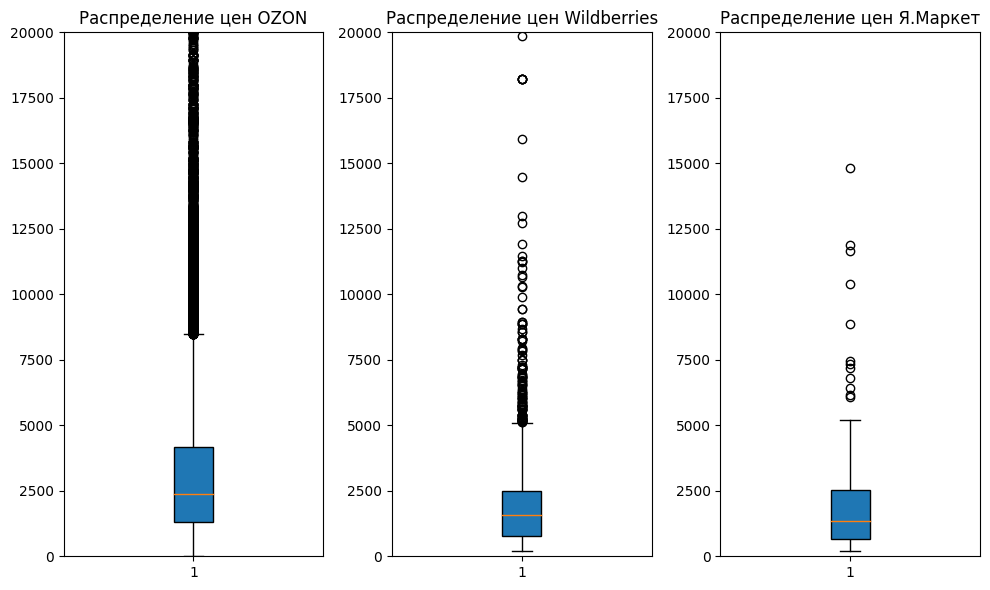

In [32]:
# Создание рисунка с тремя графиками боксплот  
plt.figure(figsize=(10, 6))  
  
plt.subplot(131)  # Первый график  
plt.boxplot(mobile_ozn['final_price'], patch_artist=True)  
plt.title('Распределение цен OZON') 
plt.ylim(0, 20000)

plt.subplot(132)
plt.boxplot(mobile_wb['final_price'], patch_artist=True)
plt.title('Распределение цен Wildberries') 
plt.ylim(0, 20000)

plt.subplot(133)
plt.boxplot(mobile_yam['final_price'], patch_artist=True)
plt.title('Распределение цен Я.Маркет') 
plt.ylim(0, 20000)

plt.tight_layout()  
plt.show()


In [33]:
#функция категоризации продаж
def assign_category(sales):  
    if sales < 1:  
        return '0 продаж'  
    elif sales < 14:  
        return 'до 14 продаж'
    elif sales < 30:  
        return 'до 30 продаж'  
    elif sales < 70:  
        return 'до 70 продаж'  
    elif sales < 100:  
        return 'до 100 продаж' 
    elif sales < 150:  
        return 'до 150 продаж' 
    elif sales < 200:  
        return 'до 200 продаж'  
    else:  
        return 'Свыше 200 продаж'  

In [34]:
# Создание нового столбца 'cat_sales' с применением функции assign_category к столбцу 'sales' 

mobile_ozn = mobile_ozn.assign(cat_sales = mobile_ozn['sales'].apply(assign_category))  
mobile_wb = mobile_wb.assign(cat_sales = mobile_wb['sales'].apply(assign_category))  
mobile_yam = mobile_yam.assign(cat_sales = mobile_yam['sales'].apply(assign_category))  
mobile = mobile.assign(cat_sales = mobile['sales'].apply(assign_category))

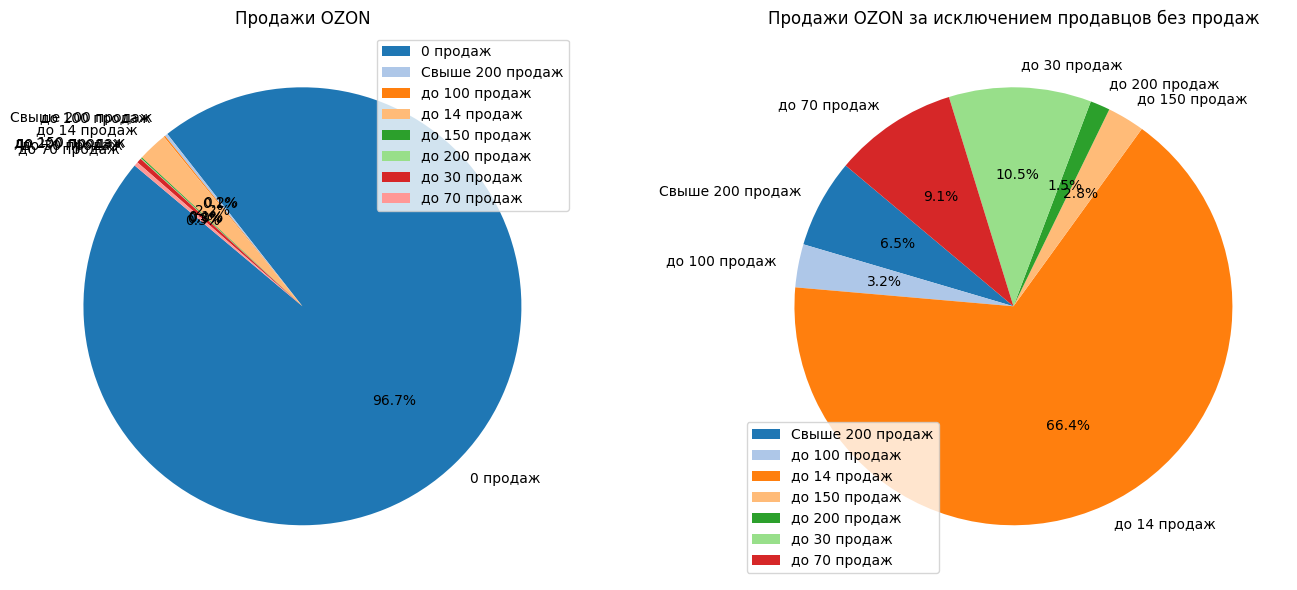

In [35]:
# Группировка данных по 'cat_sales' и подсчет количества  
cat_sales_ozon = mobile_ozn.groupby('cat_sales')['sku'].count().reset_index()  
  
plt.figure(figsize=(14, 6))  
  
# Первый график (слева)  
plt.subplot(1, 2, 1)  
plt.pie(cat_sales_ozon['sku'], labels=cat_sales_ozon['cat_sales'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)  
plt.title('Продажи OZON')  
plt.legend()  
  
# Второй график (справа)  
plt.subplot(1, 2, 2)  
# Создание среза данных без строки '0 продаж'  
cat_sales_ozon_filtered = cat_sales_ozon.query('cat_sales != "0 продаж"')  
plt.pie(cat_sales_ozon_filtered['sku'], labels=cat_sales_ozon_filtered['cat_sales'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)  
plt.title('Продажи OZON за исключением продавцов без продаж')  
plt.legend()  
  
plt.tight_layout()  
plt.show()  

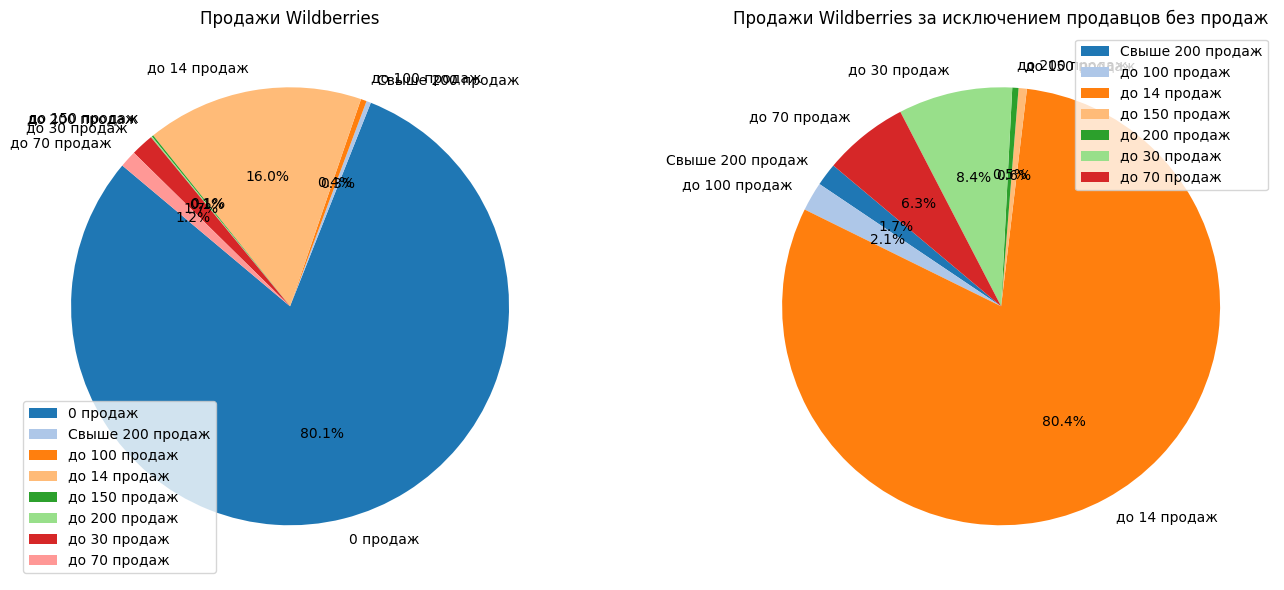

In [36]:
# Группировка данных по 'cat_sales' и подсчет количества  
cat_sales_wb = mobile_wb.groupby('cat_sales')['sku'].count().reset_index()  
  
plt.figure(figsize=(14, 6))  
  
# Первый график (слева)  
plt.subplot(1, 2, 1)  
plt.pie(cat_sales_wb['sku'], labels=cat_sales_wb['cat_sales'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)  
plt.title('Продажи Wildberries')  
plt.legend()  
  
# Второй график (справа)  
plt.subplot(1, 2, 2)  
# Создание среза данных без строки '0 продаж'  
cat_sales_wb_filtered = cat_sales_wb.query('cat_sales != "0 продаж"')  
plt.pie(cat_sales_wb_filtered['sku'], labels=cat_sales_wb_filtered['cat_sales'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)  
plt.title('Продажи Wildberries за исключением продавцов без продаж')  
plt.legend()  
  
plt.tight_layout()  
plt.show()  

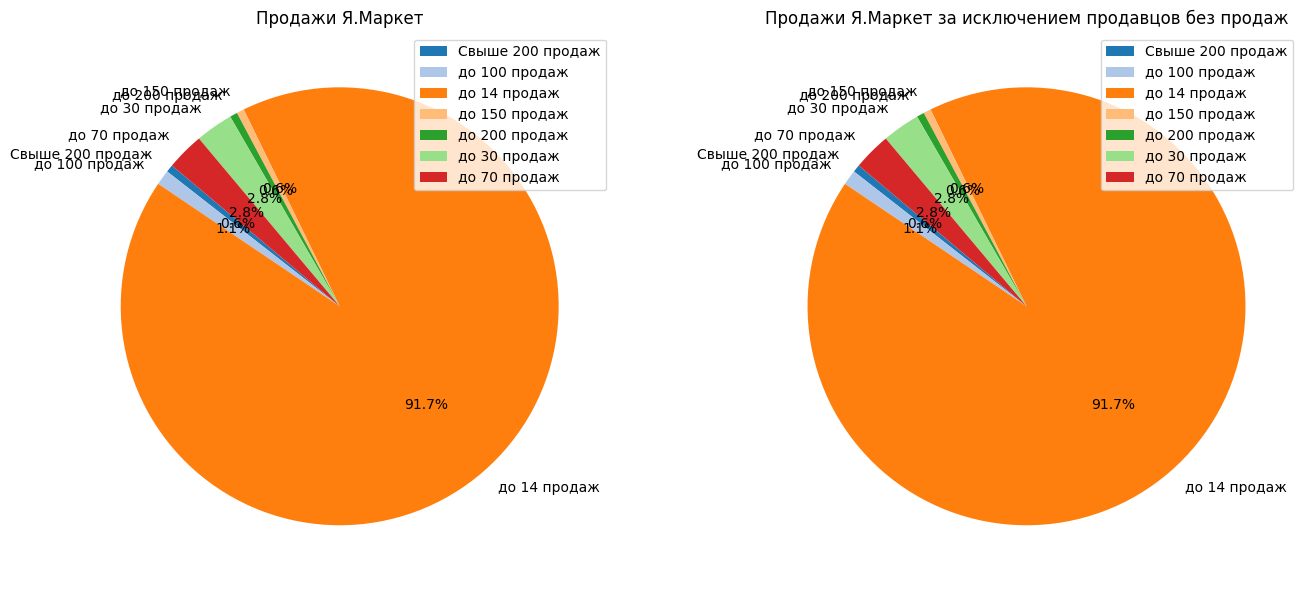

In [37]:
# Группировка данных по 'cat_sales' и подсчет количества  
cat_sales_yam = mobile_yam.groupby('cat_sales')['sku'].count().reset_index()  
  
plt.figure(figsize=(14, 6))  
  
# Первый график (слева)  
plt.subplot(1, 2, 1)  
plt.pie(cat_sales_yam['sku'], labels=cat_sales_yam['cat_sales'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)  
plt.title('Продажи Я.Маркет')  
plt.legend()  
  
# Второй график (справа)  
plt.subplot(1, 2, 2)  
# Создание среза данных без строки '0 продаж'  
cat_sales_yam_filtered = cat_sales_yam.query('cat_sales != "0 продаж"')  
plt.pie(cat_sales_yam_filtered['sku'], labels=cat_sales_yam_filtered['cat_sales'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)  
plt.title('Продажи Я.Маркет за исключением продавцов без продаж')  
plt.legend()  
  
plt.tight_layout()  
plt.show()   

## Сравенение количества мобилей деревянных и из других материалов

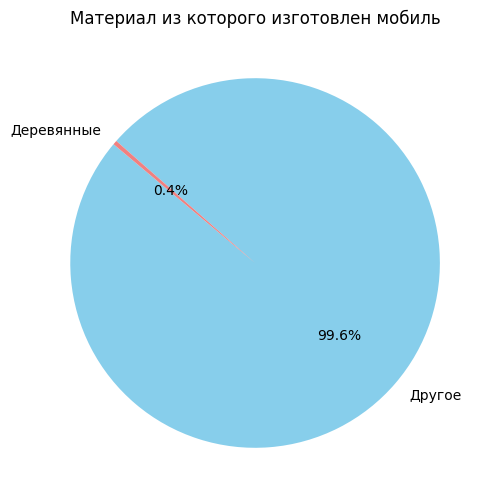

In [38]:
# Создание круговой диаграммы 
plt.figure(figsize=(6, 6))  
plt.pie(mobile['tree'].value_counts(), labels=['Другое', 'Деревянные'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])  
plt.title('Материал из которого изготовлен мобиль')  
  
plt.show()  

In [39]:
# таблица деревянных мобилей
tree = mobile[mobile['tree'] == True]  

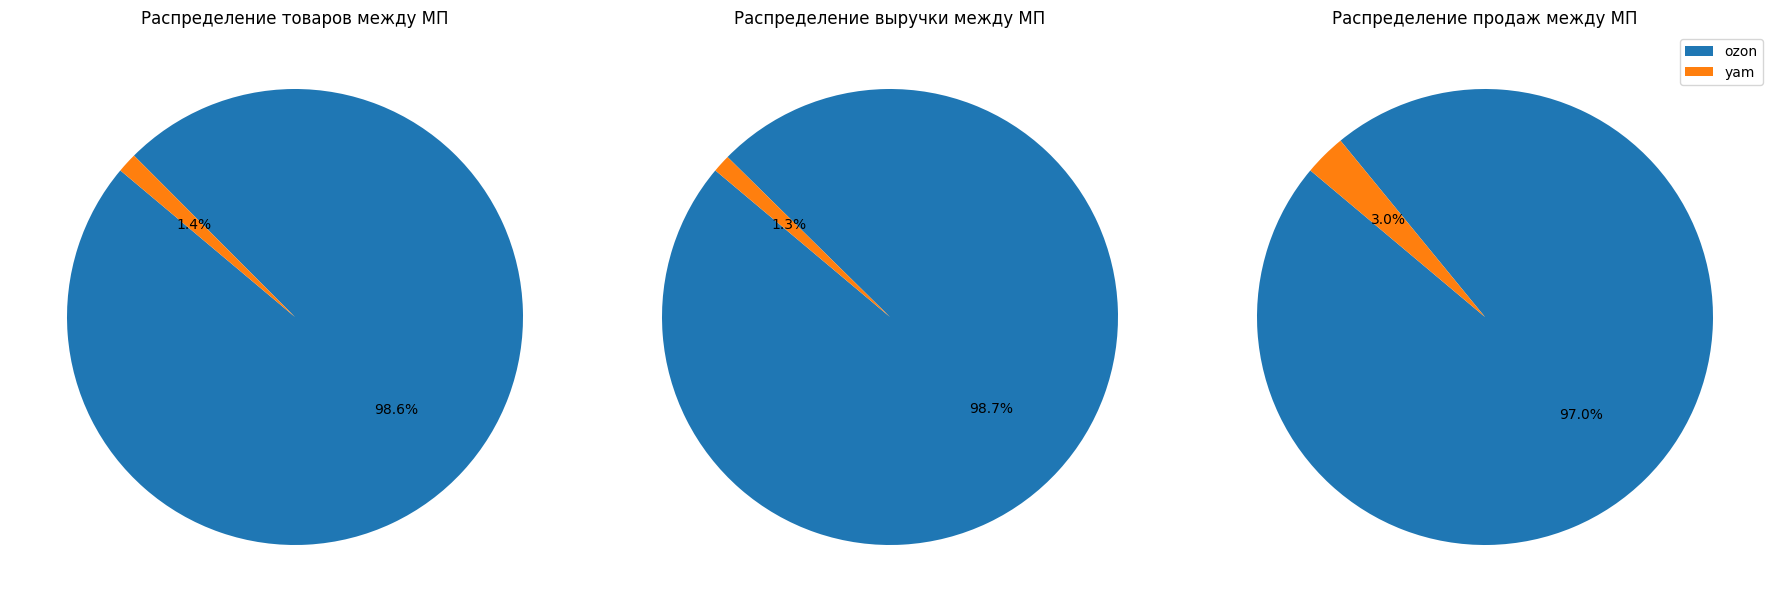

In [40]:
tree_count = tree.groupby('market')['name'].count() # подсчет количества товара на разных мп
tree_rev = tree.groupby('market')['revenue'].sum() # сумма выручки на разных мп
tree_sales = tree.groupby('market')['sales'].sum() # сумма продаж на разных мп

# создаю графики

# размер графиков  
plt.figure(figsize=(18, 6))  
  
# первый круговой график  
plt.subplot(1, 3, 1)  
plt.pie(tree_count, autopct='%1.1f%%', startangle=140)  
plt.title('Распределение товаров между МП')  

  
# второй круговой график  
plt.subplot(1, 3, 2)  
plt.pie(tree_rev, autopct='%1.1f%%', startangle=140)  
plt.title('Распределение выручки между МП')  
  

# третий круговой график  
plt.subplot(1, 3, 3)  
plt.pie(tree_sales, autopct='%1.1f%%', startangle=140)  
plt.title('Распределение продаж между МП')  
plt.legend(labels=tree_count.index)  
  
plt.tight_layout()  
plt.show()  

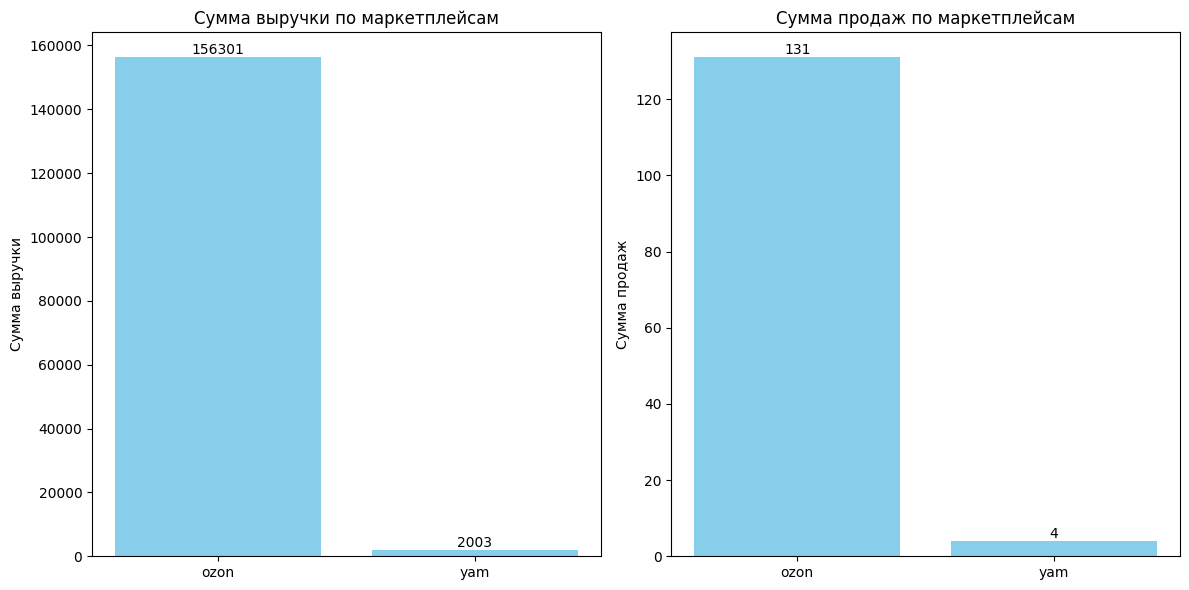

In [41]:
# Размер графиков  
plt.figure(figsize=(12, 6))  
  
# Первая столбчатая диаграмма  
plt.subplot(1, 2, 1)  
bars1 = plt.bar(tree_rev.index, tree_rev.values, color='skyblue')  
for bar in bars1:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  
plt.ylabel('Сумма выручки')  
plt.title('Сумма выручки по маркетплейсам')  
  
# Вторая столбчатая диаграмма  
plt.subplot(1, 2, 2)  
bars2 = plt.bar(tree_sales.index, tree_sales.values, color='skyblue')  
for bar in bars2:  
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')  
plt.ylabel('Сумма продаж')  
plt.title('Сумма продаж по маркетплейсам')  
  
plt.tight_layout()  
plt.show()

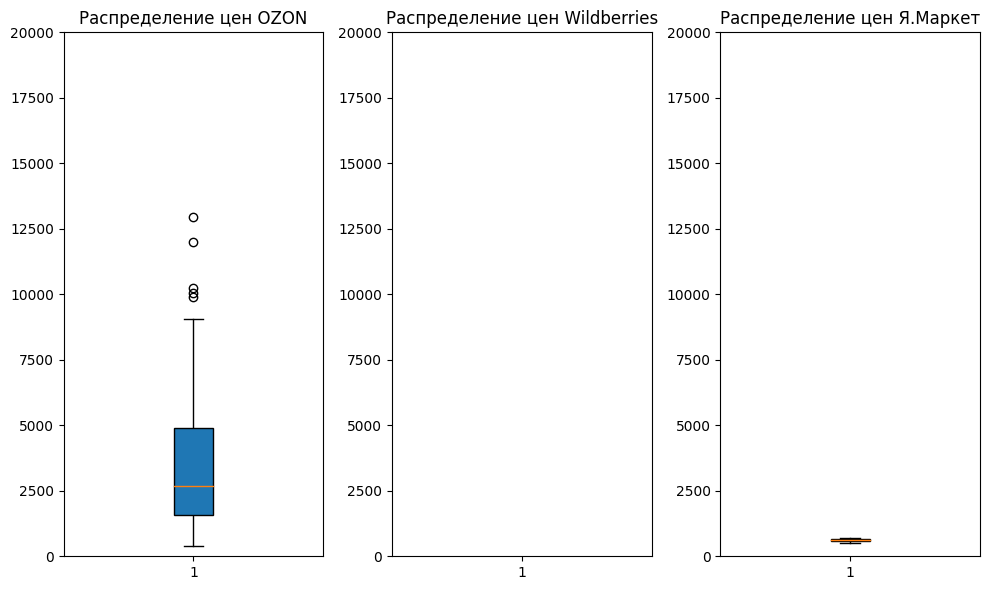

In [42]:
# три переменные для деревянного датафрема по мп
tree_ozon =  tree[tree['market'] == 'ozon']
tree_wb = tree[tree['market'] == 'wb']
tree_yam = tree[tree['market'] == 'yam']


# Создание рисунка с тремя графиками боксплот  
plt.figure(figsize=(10, 6))  
  
plt.subplot(131)  # Первый график  
plt.boxplot(tree_ozon['final_price'], patch_artist=True)  
plt.title('Распределение цен OZON') 
plt.ylim(0, 20000)

plt.subplot(132)
plt.boxplot(tree_wb['final_price'], patch_artist=True)
plt.title('Распределение цен Wildberries') 
plt.ylim(0, 20000)

plt.subplot(133)
plt.boxplot(tree_yam['final_price'], patch_artist=True)
plt.title('Распределение цен Я.Маркет') 
plt.ylim(0, 20000)

plt.tight_layout()  
plt.show()

In [43]:
# определение топовых позиций по всем маркетплейсам
sells_total_tree = tree.sort_values(by='sales', ascending=False).head(10).reset_index()
print(f"ТОП-10 товаров на всех мп по продажам:")  

sells_total_tree

ТОП-10 товаров на всех мп по продажам:


,index,sku,name,brand,seller,comments,final_price,sales,revenue,revenue_potential,lost_profit,days_with_sales,rating,market,mobile,dugs,trenager,podves,stoyka,rastyag,spiral,music,tree,kov,cat_sales
0,271,360530108,Коврик детский для ползания развивающий игровой 120х180/ складной термоковрик для новорожденных малышей двухсторонний/ Слоны и деревья,mamagoods,mamagoods,5640,972,36,36720,"47895,6522","11175,6522",13,"4,89",ozon,False,False,False,False,False,False,False,False,True,True,до 70 продаж
1,498,540125885,Умница. Развивающий коврик для малышей с сюжетами Город и Деревня для весёлых игр и развития речи ребенка с рождения,умница,Умница,78,404,25,10192,10192,0,16,"4,86",ozon,False,False,False,False,False,False,False,False,True,True,до 30 продаж
2,294,1102036576,"Коврик детский игровой 180х200 ""Дерево и Слоники"" складной и двухсторонний, на пол, пазл для ползания, для малышей, развивающий термоковрик, водонепроницаемый",mamagoods,mamagoods,1509,1340,23,32050,32050,-0,15,"4,86",ozon,False,False,False,False,False,False,False,False,True,True,до 30 продаж
3,370,675364032,"Коврик детский игровой 150х200 ""Дерево и Слоники""",mamagoods,mamagoods,1034,1283,15,19130,19130,0,10,"4,84",ozon,False,False,False,False,False,False,False,False,True,True,до 30 продаж
4,487,1421804143,Коврик детский для ползания развивающий игровой 150х200/ складной термоковрик для новорожденных малышей двухсторонний/ Киты и дерево,mamagoods,mamagoods,3108,1331,8,10792,10792,0,4,"4,87",ozon,False,False,False,False,False,False,False,False,True,True,до 14 продаж
5,542,676619010,"Коврик детский игровой 150х200 ""Киты и Дерево""",mamagoods,mamagoods,1034,1332,6,7869,7869,0,6,"4,84",ozon,False,False,False,False,False,False,False,False,True,True,до 14 продаж
6,315,149831179,Коврик детский складной развивающий для ползания Parklon Portable Деревянные лошадки 200х140х1 см,parklon,ООО ДЕМСО,891,5490,5,27450,27450,0,5,"4,84",ozon,False,False,False,False,False,False,False,False,True,True,до 14 продаж
7,790,611576244,"Коврик-пазл Деревяшки 8 сегментов , 18WPZM01",деревяшки,GULLIVER TOYS,45,1199,4,2778,2778,0,4,"4,82",ozon,False,False,False,False,False,False,False,False,True,True,до 14 продаж
8,35265,101877574285,Умница. Развивающий коврик для малышей с сюжетами Город и Деревня для весёлых игр и развития речи ребенка с рождения,умница,ООО Умница,5,520,3,1298,12980,11682,3,"4,43",yam,False,False,False,False,False,False,False,False,True,True,до 14 продаж
9,767,1102041059,"Коврик детский игровой 180х200 ""Киты и Дерево"" складной и двухсторонний, на пол, пазл для ползания, для малышей, развивающий термоковрик, водонепроницаемый",mamagoods,mamagoods,1510,1340,2,3049,3049,0,2,"4,86",ozon,False,False,False,False,False,False,False,False,True,True,до 14 продаж


In [44]:
#обзор всех брендов
print('Всего разных брендов представлено ', tree['brand'].value_counts().count())

Всего разных брендов представлено  27


In [45]:
# Группировка данных по маркетплейсу и бренду, суммирование продаж  
grouped_data = tree.groupby(['market', 'brand'])[['sales', 'revenue']].sum().reset_index()  
  
# Отсортировать данные в каждой группе по убыванию продаж и выбрать лучший бренд для каждого маркетплейса  
top_brands = grouped_data.sort_values(by='sales', ascending=False).groupby('market').head(5)  
  
# Вывести таблицу с лучшими брендами для каждого маркетпле
print('Топ-брендов с выручкой и продажами')
top_brands

Топ-брендов с выручкой и продажами


,market,brand,sales,revenue
7,ozon,mamagoods,92,112510
26,ozon,умница,25,10192
19,ozon,деревяшки,6,4258
10,ozon,parklon,5,27450
27,yam,умница,4,2003
20,ozon,десятоекоролевство,2,954
